## 1.引入包

In [46]:
#-*- coding=utf-8 -*-
import pandas as pd
import pylab
import collections
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
from operator import itemgetter, attrgetter  
from sklearn import linear_model

## 2.双对数坐标画图

In [16]:
def drawloglog(data,title):
    feature_count_pairs = collections.Counter(data).most_common()
    feature_value = zip(*feature_count_pairs)[0]
    count = zip(*feature_count_pairs)[1]
    plt.title(title)
    plt.loglog(feature_value, count,'ro',color='blue')
    plt.show()

## 3.双对数坐标线性回归拟合画图

In [47]:
def drawpic(X,pY):
    _logX = []
    _logpY = []

    for x, y in zip(X,pY): #这里可以调整
        _logX.append([float(np.log10(x))])
        _logpY.append([float(np.log10(y))])
    # 模型拟合
    regr = linear_model.LinearRegression()
    regr.fit(_logX[20:len(X)-500], _logpY[20:len(pY)-500])
    # 模型结果与得分
    print('Coefficients:', regr.coef_,)
    print("Intercept:",regr.intercept_)
    # The mean square error
    print("Residual sum of squares: %.8f"
      % np.mean((regr.predict(_logX) - _logpY) ** 2))  # 残差平方和

    # 可视化
    #plt.title("following count loglog probability distribution")
    plt.xlabel("the number of answers")
    plt.ylabel("p(k)")
    
    plt.plot(X,pY,".",  color='blue')
    plt.plot(X[20:len(X)-500], X[20:len(X)-500]**regr.coef_[0][0]*np.exp(regr.intercept_[0]), "r-",linewidth=2)
    #print plt.yticks()
    #plt.yticks(plt.yticks()[0],['$10^%f$'%w for w in range(3)]) 
    #plt.yticks()[0]
    plt.xscale('log'); plt.yscale('log')
    plt.text(5, 0.001, "Slope="+ str(round(regr.coef_[0][0],2)) ,fontsize=10);
    # plt.xticks(())
    # plt.yticks(())
    plt.show()

## 4.双对数坐标带指数截断的幂律分布拟合画图

In [ ]:
def powerLawExponentialCutOffPlot(datax,datay, xlab, ylab):
    '''
    Plot fitted powerLaw distribution with Exponential CutOff
    '''
    t = datax
    #r = np.array(range(len(data))) +1
    r = datay
    y = np.log(r[500:len(r)])
    x1 = np.log(t[500:len(r)])
    x2 = t[500:len(r)]
    x = np.column_stack((x1,x2))
    x = sm.add_constant(x, prepend=True)
    res = sm.OLS(y,x).fit()
    L,alpha,lambde = res.params
    r2 = res.rsquared
    plt.plot(t,r,".",color="blue",alpha=1)
    plt.plot(t[500:len(r)-5], (np.exp(L) * t ** alpha * np.exp(lambde * t))[500:len(r)-5],"r-",linewidth=2)
    plt.xscale('log'); plt.yscale('log')
    plt.ylim(ymax = 0.05)
    plt.xlabel(xlab, fontsize = 10)
    plt.ylabel(ylab, fontsize = 10)
    plt.text(3, 0.001, "alpha="+ str(round(alpha,3))+"\nlambda="+str(round(lambde,3)) ,fontsize=10);
    plt.show()
    print L,alpha,lambde, r2

## 5.主程序

## 5.1双对数坐标下普通用户答案数概率分布（线性回归拟合）

874
('Coefficients:', array([[-1.52251191]]))
('Intercept:', array([-0.03001452]))
Residual sum of squares: 0.11758212


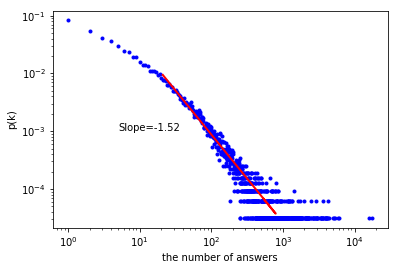

In [51]:
Location = r'../数据/论文用/普通用户detail表.csv'
#df = pd.read_csv(Location,dtype={'user_detail.userid':np.str,'user_detail.following_count':np.int32})
df = pd.read_csv(Location)
#drawloglog(df['answer_count'],'users_answer_count_distribution')
feature_count_pairs = collections.Counter(df['answer_count']).most_common()
X = zip(*feature_count_pairs)[0]
count = zip(*feature_count_pairs)[1]
pY = [float(float(n)/sum(count)) for n in count]
print len(X)

np.array(X)[0] = 0.00001
drawpic(np.array(X)[1:],np.array(pY)[1:])

## 5.2双对数坐标下普通用户答案数概率分布（带指数截断的幂律分布拟合）

874


/usr/local/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


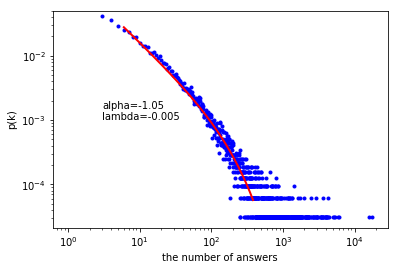

-1.68166758552 -1.04977121525 -0.00480838644568 0.936142445412


In [52]:
pairs = sorted(feature_count_pairs,reverse=True)
X = np.array(zip(*pairs)[0])
Y = np.array(zip(*pairs)[1])
pY = [y/float(sum(Y)) for y in zip(*pairs)[1]]
print len(pY)
import statsmodels.api as sm
from pylab import *

powerLawExponentialCutOffPlot(np.array(X[:-1]),np.array(pY[:-1]),"the number of answers","p(k)")